# Get network stats

In [67]:
import pickle
import pandas as pd
import networkx as nx
import pickle
import numpy as np
import powerlaw
import matplotlib.pyplot as plt
import community as community_louvain
from collections import defaultdict, Counter
from infomap import Infomap
from matplotlib_venn import venn3

In [68]:
def graph_stats(G):
    """Returns various statistics of a given graph G."""
    stats = {}
    stats['num_nodes'] = G.number_of_nodes()
    stats['num_edges'] = G.number_of_edges()
    stats['density'] = nx.density(G)
    
    degrees = [d for n, d in G.degree()]
    stats['mean_degree'] = np.mean(degrees)
    stats['std_degree'] = np.std(degrees)
    stats['global_clustering_coeff'] = nx.transitivity(G)
    
    stats['degree_assortativity'] = nx.degree_assortativity_coefficient(G)
    
    # Giant Connected Component (GCC)
    if nx.is_directed(G) == False:
        largest_cc = max(nx.connected_components(G), key=len)
        GCC = G.subgraph(largest_cc)
        stats['GCC_size'] = len(GCC)
    
    # Power-law fitting
    try:
        fit = powerlaw.Fit(degrees)
        stats['power_law_alpha'] = fit.alpha  
        stats['power_law_xmin'] = fit.xmin  
        stats['ks_test_statistic'] = fit.D 

        distribution_list = ['lognormal', 'exponential', 'truncated_power_law']
        comparison_results = {}
        
        for dist in distribution_list:
            R, p = fit.distribution_compare('power_law', dist)
            comparison_results[dist] = (R, p)
        
        best_fit = min(comparison_results.items(), key=lambda x: (x[1][0], x[1][1]))
        best_dist, (best_R, best_p) = best_fit
        
        stats['best_powerlaw_comparison'] = f"power law vs {best_dist}: R = {best_R:.3f}, p = {best_p:.3f}"
    
    except Exception as e:
        stats['power_law_test_error'] = str(e)
    
    return stats

### Likes network

In [20]:
with open("../shared-folder-gald/data/likes_network.pkl", "rb") as f:
    likes = pickle.load(f)

In [21]:
likes_stats = graph_stats(likes)

Calculating best minimal value for power law fit


Assuming nested distributions


In [22]:
for key, val in likes_stats.items():
    print(key,'-', val)

num_nodes - 496
num_edges - 9921
density - 0.08081622678396871
mean_degree - 40.00403225806452
std_degree - 22.83716869630462
global_clustering_coeff - 0.9331319000581058
degree_assortativity - 0.5769104907851405
GCC_size - 449
power_law_alpha - 3.9807634397976934
power_law_xmin - 39.0
ks_test_statistic - 0.17662559817547108
best_powerlaw_comparison - power law vs exponential: R = -7.855, p = 0.031


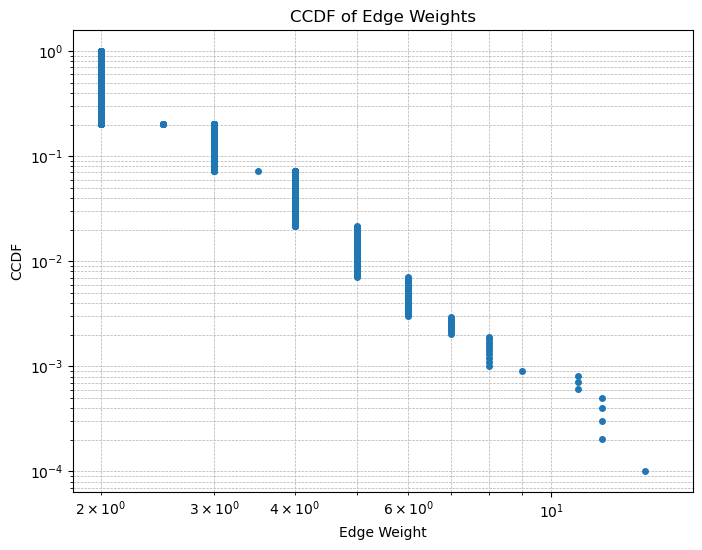

In [ ]:
weights = [d['weight'] for _, _, d in likes.edges(data=True)]

weights_sorted = np.sort(weights)

ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


### Hashtag coocurence

In [4]:
with open('../shared-folder-gald/data/unipartite_og.pkl', 'rb') as f:
    HC = pickle.load(f)

In [5]:
HC_stats = graph_stats(HC)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Assuming nested distributions


In [7]:
for key, val in HC_stats.items():
    print(key,'-', val)

num_nodes - 673697
num_edges - 35570526
density - 0.00015674427983923908
mean_degree - 105.597994350576
std_degree - 713.0254975203421
diameter - None
degree_assortativity - -0.05238549368106408
GCC_size - 671514
power_law_alpha - 2.140394228821985
power_law_xmin - 154.0
ks_test_statistic - 0.007946039245517178
best_powerlaw_comparison - power law vs truncated_power_law: R = -134.901, p = 0.000


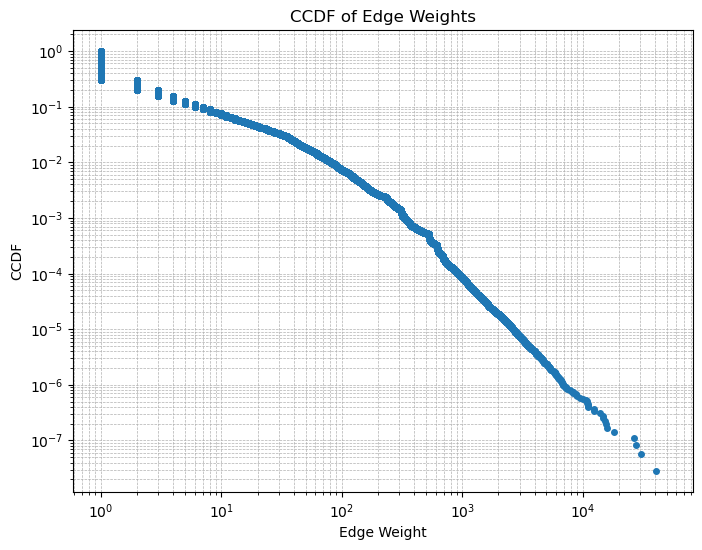

In [ ]:
weights = [d['weight'] for _, _, d in HC.edges(data=True)]

weights_sorted = np.sort(weights)

ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


### Follow network

In [9]:
with open('../shared-folder-gald/data/follow_graph.pkl', 'rb') as f:
    FG = pickle.load(f)

In [12]:
FG_stats = graph_stats(FG)

Calculating best minimal value for power law fit


Assuming nested distributions


In [13]:
for key, val in FG_stats.items():
    print(key,'-', val)

num_nodes - 62876
num_edges - 10786891
density - 0.002728559238120485
mean_degree - 343.116324193651
std_degree - 913.8445860384836
global_clustering_coeff - 0.12280097840676181
degree_assortativity - -0.15184128957300969
power_law_alpha - 2.551824576423133
power_law_xmin - 1152.0
ks_test_statistic - 0.028032308521774962
best_powerlaw_comparison - power law vs truncated_power_law: R = -32.243, p = 0.000


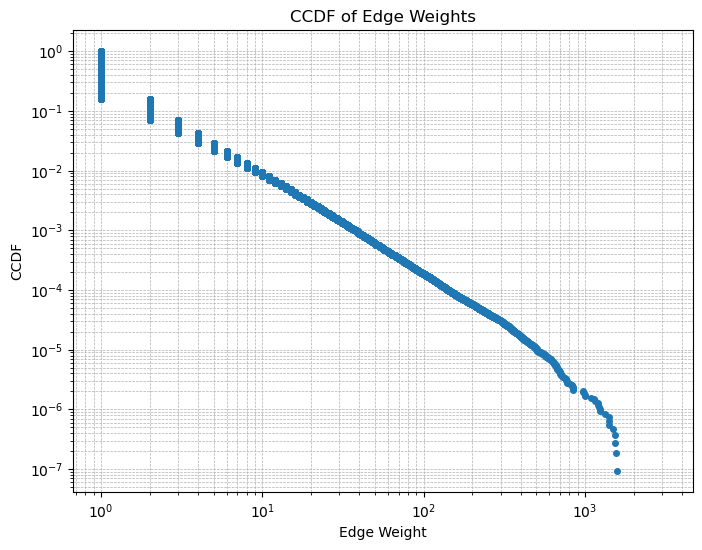

In [ ]:
weights = [d['weight'] for _, _, d in FG.edges(data=True)]

weights_sorted = np.sort(weights)

ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### Duet/Stitch network

In [69]:
with open('../shared-folder-gald/data/duet_stitch_graph.pkl', 'rb') as f:
    ds = pickle.load(f)

In [16]:
ds_stats = graph_stats(ds)

Calculating best minimal value for power law fit


Assuming nested distributions


In [17]:
for key, val in ds_stats.items():
    print(key,'-', val)

num_nodes - 4209
num_edges - 55093
density - 0.0031105827906342284
mean_degree - 26.17866476597767
std_degree - 55.150688072688126
global_clustering_coeff - 0.06421140469689947
degree_assortativity - -0.16337379922791187
power_law_alpha - 2.6651836732904606
power_law_xmin - 100.0
ks_test_statistic - 0.04588388191193715
best_powerlaw_comparison - power law vs truncated_power_law: R = -0.834, p = 0.196


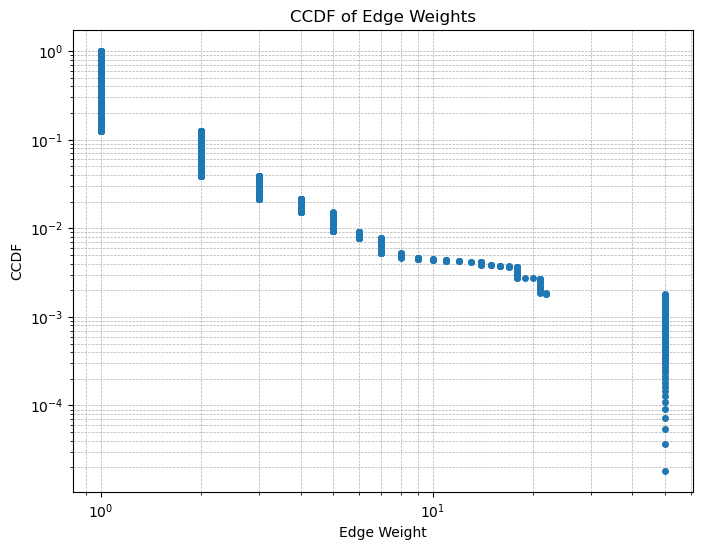

In [ ]:
weights = [d['weight'] for _, _, d in ds.edges(data=True)]

weights_sorted = np.sort(weights)

ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

Filtering:
Disparity filter - understand the parameters


Analysis:
Overlap between networks np. highest weights
Map on semantic space and their differences

# Structural analysis

Networks' names:

duet/stitch - ds

follow - follows

haashtag coocurrence - hc

likes - likes

## Centralities

In [5]:
with open('ready_networks/follow_filtered.pkl', 'rb') as f:
    follows = pickle.load(f)

In [6]:
with open('ready_networks/cooc_filtered.pkl', 'rb') as f:
    hc = pickle.load(f)

In [8]:
with open('ready_networks/ds_network.pkl', 'rb') as f:
    ds = pickle.load(f)

In [9]:
with open('ready_networks/likes_network.pkl', 'rb') as f:
    likes = pickle.load(f)

In [10]:
# degree centrality
ds_dc = nx.degree_centrality(ds)
follows_dc = nx.degree_centrality(follows)
hc_dc = nx.degree_centrality(hc)
likes_dc = nx.degree_centrality(likes)

# closeness centrality
ds_cc = nx.closeness_centrality(ds)
follows_cc = nx.closeness_centrality(follows)
hc_cc = nx.closeness_centrality(hc)
likes_cc = nx.closeness_centrality(likes)

# betweenness centrality
ds_bc = nx.betweenness_centrality(ds)
follows_bc = nx.betweenness_centrality(follows)
hc_bc = nx.betweenness_centrality(hc)
likes_bc = nx.betweenness_centrality(likes)


In [ ]:
# save all centralities 
centrality_data = {
    "ds_dc": ds_dc,
    "follows_dc": follows_dc,
    "hc_dc": hc_dc,
    "likes_dc": likes_dc,

    "ds_cc": ds_cc,
    "follows_cc": follows_cc,
    "hc_cc": hc_cc,
    "likes_cc": likes_cc,

    "ds_bc": ds_bc,
    "follows_bc": follows_bc,
    "hc_bc": hc_bc,
    "likes_bc": likes_bc
}

with open("analysis_output/all_centralities.pkl", "wb") as f:
    pickle.dump(centrality_data, f)

In [70]:
# load all centralities

with open("analysis_output/all_centralities.pkl", "rb") as f:
    centrality_data = pickle.load(f)

ds_dc = centrality_data["ds_dc"]
follows_dc = centrality_data["follows_dc"]
hc_dc = centrality_data["hc_dc"]
likes_dc = centrality_data["likes_dc"]

ds_cc = centrality_data["ds_cc"]
follows_cc = centrality_data["follows_cc"]
hc_cc = centrality_data["hc_cc"]
likes_cc = centrality_data["likes_cc"]

ds_bc = centrality_data["ds_bc"]
follows_bc = centrality_data["follows_bc"]
hc_bc = centrality_data["hc_bc"]
likes_bc = centrality_data["likes_bc"]


In [71]:
def get_top_k(centrality_dict, k=50):
    """Return list of top-k hashtags sorted by centrality value."""
    return [tag for tag, val in sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:k]]

top_50_degree = {
    'Hashtag Co-occurrence': get_top_k(hc_dc),
    'Likes': get_top_k(likes_dc),
    'Follows': get_top_k(follows_dc),
    'Duet/Stitch': get_top_k(ds_dc)
}
top_50_closeness = {
    'Hashtag Co-occurrence': get_top_k(hc_cc),
    'Likes': get_top_k(likes_cc),
    'Follows': get_top_k(follows_cc),
    'Duet/Stitch': get_top_k(ds_cc)
}
top_50_betweenness = {
    'Hashtag Co-occurrence': get_top_k(hc_bc),
    'Likes': get_top_k(likes_bc),
    'Follows': get_top_k(follows_bc),
    'Duet/Stitch': get_top_k(ds_bc)
}

df_degree = pd.DataFrame(top_50_degree)
df_closeness = pd.DataFrame(top_50_closeness)
df_betweenness = pd.DataFrame(top_50_betweenness)

In [72]:
degree_set = set(sum(top_50_degree.values(), []))
closeness_set = set(sum(top_50_closeness.values(), []))
betweenness_set = set(sum(top_50_betweenness.values(), []))


In [73]:
central_in_all = degree_set & closeness_set & betweenness_set
print("Hashtags appearing in all three centrality top-50 lists:")
print(central_in_all)


Hashtags appearing in all three centrality top-50 lists:
{'learnontiktok', 'ecotok', 'nature', 'trump', 'frenchbulldoggs', 'climatechange', 'style', 'beautiful', 'garden', 'ocean', 'yummy', 'family', 'explore', 'uk', 'frenchbulldogforsale', 'biden', 'climatejustice', 'sustainability', 'republican', 'plasticpollution', 'plantbased', 'happy', 'travel', 'cooking', 'climateaction', 'education', 'art', 'politics', 'summer', 'climatecrisis', 'motivation', 'zerowaste', 'greenscreen', 'meme', 'life', 'selfcare', 'sustainablefashion', 'health', 'socialjustice', 'cute', 'ecofriendly', 'frenchbulldogfluffy', 'animals', 'comedy', 'sustainableliving', 'sustainable', 'gardening', 'weather', 'democrat', 'wildlife', 'mentalhealth', 'music', 'conservation', 'plasticfree', 'lifestyle', 'usa', 'vegan', 'fun', 'climate', 'diy', 'food', 'slowfashion', 'smallbusiness', 'foodie', 'fashion', 'frenchbulldogfamily'}


In [75]:
hashtag_to_centralities = defaultdict(set)

for tag in degree_set:
    hashtag_to_centralities[tag].add("degree")
for tag in closeness_set:
    hashtag_to_centralities[tag].add("closeness")
for tag in betweenness_set:
    hashtag_to_centralities[tag].add("betweenness")

unique_to_degree = []
unique_to_closeness = []
unique_to_betweenness = []

for tag, centralities in hashtag_to_centralities.items():
    if len(centralities) == 1:
        cent = list(centralities)[0]
        if cent == "degree":
            unique_to_degree.append(tag)
        elif cent == "closeness":
            unique_to_closeness.append(tag)
        elif cent == "betweenness":
            unique_to_betweenness.append(tag)

print("Hashtags uniquely central by centrality type:\n")

print("Degree Centrality (unique):")
print(unique_to_degree, "\n")

print("Closeness Centrality (unique):")
print(unique_to_closeness, "\n")

print("Betweenness Centrality (unique):")
print(unique_to_betweenness)


Hashtags uniquely central by centrality type:

Degree Centrality (unique):
['gma', 'drinks', 'moment', 'icecoffee', 'easydressing', 'royals', 'oscars', 'redcarpet', 'mochacoffee', 'easylunch', 'nativeamerican', 'info', 'dancingongma', 'lemonade', 'drinkideas', 'mocha', 'easydressingrecipe', 'icecoffees', 'mochas', 'fastdressing', 'drinkspindrift', 'dancingwiththestars', 'shangela', 'lemonades', 'ice', 'easylunchideas', 'lemongrass', 'maga', 'joebiden', 'growyourownfood', 'flavoryourworld', 'inspiration', 'easylunches', 'moments', 'democrats', 'lemonade🍋', 'dwts', 'lemon', 'icedcoffee', 'icedcoffees', 'flavoryourwater', 'bachelornation', 'drinksupercoffee', 'lemonicetea', 'icedtea'] 

Closeness Centrality (unique):
['severeweather', 'storm', 'wga', 'alexwilson', 'sustainableswaps', 'upcycle', 'wildfood', 'celebrity', 'eco', 'makeuphacks', 'sustainabledesign', 'lunchboxes?', 'reusable', 'entertainment', 'easyrecipe', 'environment', 'compost', 'cop27', 'foodwastetip', 'environmentalist', 

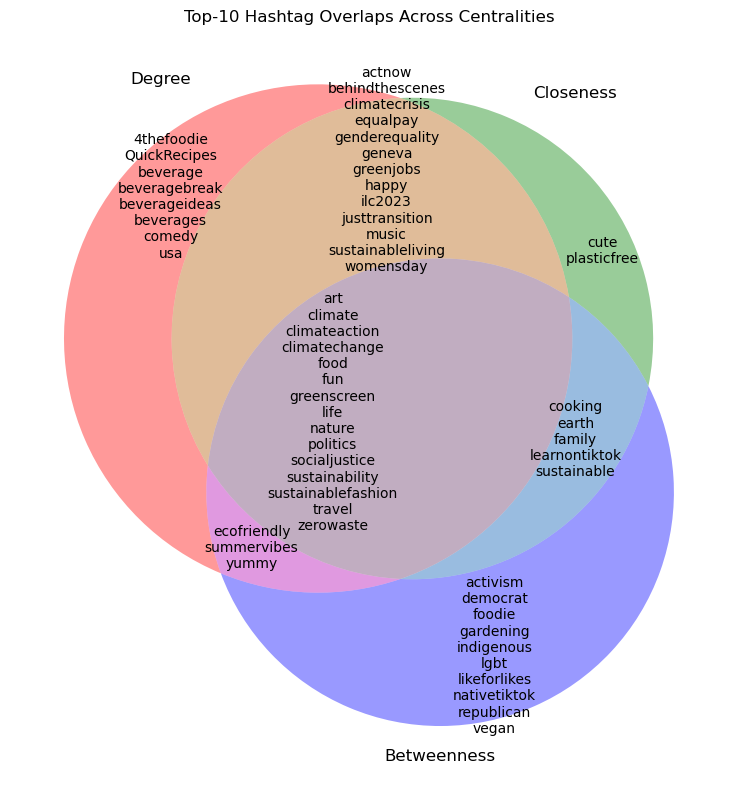

In [93]:
top_10_degree = {
    'Hashtag Co-occurrence': get_top_k(hc_dc, k=10),
    'Likes': get_top_k(likes_dc, k=10),
    'Follows': get_top_k(follows_dc, k=10),
    'Duet/Stitch': get_top_k(ds_dc, k=10)
}
top_10_closeness = {
    'Hashtag Co-occurrence': get_top_k(hc_cc, k=10),
    'Likes': get_top_k(likes_cc, k=10),
    'Follows': get_top_k(follows_cc, k=10),
    'Duet/Stitch': get_top_k(ds_cc, k=10)
}
top_10_betweenness = {
    'Hashtag Co-occurrence': get_top_k(hc_bc, k=10),
    'Likes': get_top_k(likes_bc, k=10),
    'Follows': get_top_k(follows_bc, k=10),
    'Duet/Stitch': get_top_k(ds_bc, k=10)
}

degree_top10 = set(sum(top_10_degree.values(), []))
closeness_top10 = set(sum(top_10_closeness.values(), []))
betweenness_top10 = set(sum(top_10_betweenness.values(), []))

plt.figure(figsize=(10, 8))
v = venn3(
    [degree_top10, closeness_top10, betweenness_top10],
    set_labels=('Degree', 'Closeness', 'Betweenness')
)

def get_subset_labels(d, c, b):
    return {
        '100': d - c - b,
        '010': c - d - b,
        '001': b - d - c,
        '110': d & c - b,
        '101': d & b - c,
        '011': c & b - d,
        '111': d & c & b
    }

labels = get_subset_labels(degree_top10, closeness_top10, betweenness_top10)

# make the text not overlap
label_positions = {
    '100': (-0.4, 0.35),
    '010': (0.4, 0.25),
    '001': (0.2, -0.5),
    '110': (0.0, 0.4),
    '101': (-0.25, -0.3),
    '011': (0.35, -0.1),
    '111': (-0.1, -0.05)
}

for subset_id, hashtags in labels.items():
    label = v.get_label_by_id(subset_id)
    if label and hashtags:
        label.set_text("\n".join(sorted(hashtags)))
        x_pos, y_pos = label_positions[subset_id]
        label.set_position((x_pos, y_pos))

plt.title("Top-10 Hashtag Overlaps Across Centralities")
plt.tight_layout()
plt.show()

In [94]:
plt.savefig("analysis_output/venn_diagram_top10_hashtags.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [95]:
hc_top50 = set(top_50_degree['Hashtag Co-occurrence']) | set(top_50_closeness['Hashtag Co-occurrence']) | set(top_50_betweenness['Hashtag Co-occurrence'])
likes_top50 = set(top_50_degree['Likes']) | set(top_50_closeness['Likes']) | set(top_50_betweenness['Likes'])
follows_top50 = set(top_50_degree['Follows']) | set(top_50_closeness['Follows']) | set(top_50_betweenness['Follows'])
ds_top50 = set(top_50_degree['Duet/Stitch']) | set(top_50_closeness['Duet/Stitch']) | set(top_50_betweenness['Duet/Stitch'])

all_sets = {
    'Hashtag Co-occurrence': hc_top50,
    'Likes': likes_top50,
    'Follows': follows_top50,
    'Duet/Stitch': ds_top50
}

all_hashtags = hc_top50 | likes_top50 | follows_top50 | ds_top50

hashtag_counts = defaultdict(int)
for net_set in all_sets.values():
    for tag in net_set:
        hashtag_counts[tag] += 1

unique_to_one_network = {tag for tag, count in hashtag_counts.items() if count == 1}

for network_name, network_set in all_sets.items():
    print(f"\nHashtags unique to {network_name}:")

    for centrality_name, centrality_dict in zip(['Degree', 'Closeness', 'Betweenness'], 
                                               [top_50_degree, top_50_closeness, top_50_betweenness]):
        
        centrality_set = set(centrality_dict[network_name])
        
        if centrality_name == 'Degree':
            unique_in_centrality = centrality_set - (set(top_50_closeness[network_name]) | set(top_50_betweenness[network_name]))
        elif centrality_name == 'Closeness':
            unique_in_centrality = centrality_set - (set(top_50_degree[network_name]) | set(top_50_betweenness[network_name]))
        else:  # betweenness
            unique_in_centrality = centrality_set - (set(top_50_degree[network_name]) | set(top_50_closeness[network_name]))
        
        if unique_in_centrality:
            print(f"{centrality_name} Centrality: {sorted(unique_in_centrality)}")


Hashtags unique to Hashtag Co-occurrence:
Degree Centrality: ['inspiration', 'uk']
Closeness Centrality: ['christmas', 'home', 'nyc', 'photooftheday', 'work']
Betweenness Centrality: ['garden', 'homedecor', 'indigenous', 'momsoftiktok', 'ocean', 'republican', 'sustainableliving', 'vintage']

Hashtags unique to Likes:
Degree Centrality: ['drinkideas', 'drinks', 'drinkspindrift', 'drinksupercoffee', 'easydressing', 'easydressingrecipe', 'easylunch', 'easylunches', 'easylunchideas', 'fastdressing', 'flavoryourwater', 'flavoryourworld', 'ice', 'icecoffee', 'icecoffees', 'icedcoffee', 'icedcoffees', 'icedtea', 'lemon', 'lemonade', 'lemonades', 'lemonade🍋', 'lemongrass', 'lemonicetea', 'mocha', 'mochacoffee', 'mochas', 'moment', 'moments']
Closeness Centrality: ['allen', 'animalfacts', 'animals', 'antarctica', 'astronaut', 'australia', 'axiom2', 'bees', 'butterflies', 'compost', 'cool', 'eco', 'ecodesign', 'ecohome', 'ecoswaps', 'ecotravel', 'environmentalist', 'foodwaste', 'foodwastepreven

## Community detection

In [96]:
# load the networks

with open('ready_networks/follow_filtered.pkl', 'rb') as f:
    follows = pickle.load(f)
with open('ready_networks/cooc_filtered.pkl', 'rb') as f:
    hc = pickle.load(f)
with open('ready_networks/ds_network.pkl', 'rb') as f:
    ds = pickle.load(f)
with open('ready_networks/likes_network.pkl', 'rb') as f:
    likes = pickle.load(f)

### Likes

In [97]:
likes_partition = community_louvain.best_partition(likes)
# nx.set_node_attributes(likes, partition, 'community')

In [98]:
likes_comm_sizes = Counter(likes_partition.values())
print(f"Number of communities: {len(likes_comm_sizes)}")
print("Community sizes:", likes_comm_sizes)

Number of communities: 14
Community sizes: Counter({1: 78, 3: 61, 7: 61, 2: 52, 6: 44, 5: 43, 9: 38, 13: 30, 8: 28, 11: 18, 0: 12, 10: 7, 12: 4, 4: 4})


In [99]:
likes_comm_hashtags = defaultdict(list)
for node, comm_id in likes_partition.items():
    likes_comm_hashtags[comm_id].append(node)

likes_sorted_comms = sorted(likes_comm_hashtags.items(), key=lambda x: len(x[1]), reverse=True)

for comm_id, members in likes_sorted_comms[:10]:
    print(f"\nCommunity {comm_id} (size={len(members)}):")
    print(", ".join(members[:50])) 


Community 1 (size=78):
4thefoodie, QuickRecipes, beverage, beveragebreak, beverageideas, beverages, break, breaks, coffee, coffees, cottagecheese, cottagecheeserecipes, dance, dancing, dancingfruit, drink, drinkidea, drinkideas, drinks, drinkspindrift, drinksupercoffee, easydressing, easydressingrecipe, easylunch, easylunches, easylunchideas, fastdressing, flavoryourwater, flavoryourworld, ice, icecoffee, icecoffees, icedcoffee, icedcoffees, icedtea, lemon, lemonade, lemonades, lemonade🍋, lemongrass, lemonicetea, mocha, mochacoffee, mochas, moment, moments, onlineshop, onlineshopping, reflecting, refresh

Community 3 (size=61):
cooking, chicken, chickenrecipesfordinner, chinafood, delicious, dinneridea, easyrecipe, foodie, foodoftiktok, homemade, recipes, tiktokfoods, architecture, design, eco, ecodesign, ecotravel, gogreen, goinggreen, greenarchitecture, lunchboxes?, makeuphacks, nottingham, plasticfree, reusable, stainlesssteel, sustainability, sustainablearchitecture, sustainablede

### Hashtag coocurrence

In [100]:
hc_partition = community_louvain.best_partition(hc)

In [101]:
hc_comm_sizes = Counter(hc_partition.values())
print(f"Number of communities: {len(hc_comm_sizes)}")
print("Community sizes:", hc_comm_sizes)

Number of communities: 587
Community sizes: Counter({6: 6229, 2: 4339, 1: 2904, 5: 2788, 15: 2336, 0: 2156, 19: 2003, 21: 1622, 20: 1327, 10: 970, 3: 967, 27: 914, 8: 770, 24: 767, 22: 749, 16: 719, 7: 683, 11: 675, 14: 666, 18: 663, 13: 642, 12: 510, 9: 501, 29: 448, 34: 395, 37: 314, 32: 230, 25: 221, 30: 208, 52: 129, 87: 80, 49: 75, 42: 74, 39: 63, 35: 42, 119: 30, 53: 27, 92: 27, 140: 25, 221: 23, 111: 20, 184: 20, 94: 17, 280: 17, 420: 17, 83: 14, 186: 12, 44: 11, 101: 11, 265: 11, 284: 11, 114: 10, 145: 10, 175: 10, 219: 10, 76: 9, 46: 8, 79: 8, 143: 8, 162: 8, 198: 8, 289: 8, 126: 7, 167: 7, 234: 7, 245: 7, 410: 7, 26: 6, 85: 6, 98: 6, 136: 6, 147: 6, 177: 6, 252: 6, 282: 6, 316: 6, 323: 6, 345: 6, 448: 6, 577: 6, 31: 5, 40: 5, 41: 5, 43: 5, 59: 5, 108: 5, 157: 5, 226: 5, 240: 5, 249: 5, 276: 5, 288: 5, 353: 5, 375: 5, 378: 5, 476: 5, 38: 4, 63: 4, 64: 4, 68: 4, 78: 4, 93: 4, 105: 4, 106: 4, 142: 4, 172: 4, 202: 4, 208: 4, 230: 4, 253: 4, 254: 4, 273: 4, 310: 4, 322: 4, 325: 4,

In [102]:
hc_comm_hashtags = defaultdict(list)
for node, comm_id in hc_partition.items():
    hc_comm_hashtags[comm_id].append(node)

hc_sorted_comms = sorted(hc_comm_hashtags.items(), key=lambda x: len(x[1]), reverse=True)

for comm_id, members in hc_sorted_comms[:10]:
    print(f"\nCommunity {comm_id} (size={len(members)}):")
    print(", ".join(members[:50])) 


Community 6 (size=6229):
utah, art, style, green, solar, fashionillustration, fashiondesign, realestateagent, sunnies, sunglasses, consciousliving, ditchsingleuse, neutralhomedecor, unpapertowels, homeandsoul, furniture, ethical, homeandsouldubai, mompreneur, dubailiving, dubaismallbusiness, greenliving, decor, madeinoregon, worldnewstonight, zerowaste, reducereuse, boho, lowwaste, thinkreusable, madeinamerica, gogreen, dubaiinteriors, zerowastekitchen, interiortrends, marleysmonsters, zerowastehome, homeinteriors, handmade, interiorinspiration, plasticfree, handcrafted, sustainability, sustainable, balistyle, sustainablelifestyle, shopsmall, dubaidesign, dubaivilla, styling

Community 2 (size=4339):
peace, inspiration, cookingwithlove, foodtiktok, cookingvideo, cookingwithcosta, recipevideo, costaskitchen, foodchallenge, foodie, recipeoftheday, cooking, costas, food, costa, recipe, foodlover, foodies, foodiesofinstagram, yummygoodness, foodiestiktok, creator, chicken, breakfast, heal

### Duet/Stitch

In [103]:
ds_nodes = list(ds.nodes())
ds_node_to_id = {node: i for i, node in enumerate(ds_nodes)}
ds_id_to_node = {i: node for node, i in ds_node_to_id.items()}


In [104]:
ds_im = Infomap()

for u, v in ds.edges():
    ds_im.add_link(ds_node_to_id[u], ds_node_to_id[v])

ds_im.run()

  Infomap v2.8.0 starts at 2025-04-29 12:01:23
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 4195 nodes and 54728 links...
  -> One-level codelength: 11.0198386

Trial 1/1 starting at 2025-04-29 12:01:23
Two-level compression: 16% 2.2% 
Partitioned to codelength 1.82142158 + 7.265326 = 9.086747582 in 94 modules.
Super-level compression: to codelength 9.086747582 in 94 top modules.

Recursive sub-structure compression: 0.0177280654% 0% . Found 3 levels with codelength 9.085136678

=> Trial 1/1 finished in 0.152624084s with codelength 9.08513668


Summary after 1 trial
Best end modular solution in 3 levels:
Per level number of modules:         [         94,           5,           0] (sum: 99)
Per level number of leaf nodes:      [          0,        4

In [105]:
ds_node_to_module = {ds_id_to_node[node.node_id]: node.module_id for node in ds_im.nodes}

ds_comm_sizes = Counter(ds_node_to_module.values())

print(f"Number of communities: {len(ds_comm_sizes)}")
print("Top 10 community sizes:", ds_comm_sizes.most_common(10))

Number of communities: 94
Top 10 community sizes: [(1, 667), (2, 485), (4, 174), (3, 159), (5, 120), (6, 110), (9, 105), (7, 102), (10, 96), (12, 88)]


In [106]:
ds_comms = defaultdict(list)
for node_id, module_id in ds_node_to_module.items():
    ds_comms[module_id].append(node_id)

ds_sorted_comms = sorted(ds_comms.items(), key=lambda x: len(x[1]), reverse=True)

for module_id, members in ds_sorted_comms[:10]:
    print(f"\nCommunity {module_id} (size={len(members)}):")
    print(", ".join(members[:50]))


Community 1 (size=667):
politics, republican, democrat, liberal, biden, climatechange, trump, conservative, politicaltiktok, usa, climatecrisis, maga, political, leftist, worldnews, gop, russia, donaldtrump, joebiden, ukrainewar, ukraine, democrats, trump2024, pakistan, genz, newsroundup, roundup, thisweek, zelenskyy, republicans, congress, texas, voteblue, unitedstates, fyi, vote, 2024election, american, humanrights, politicalnews, murica, progressive, chronicpain, environment, red, cpp, unitedwestrike, left, cnn, newyork

Community 2 (size=485):
socialjustice, ilc2023, equalpay, justtransition, genderequality, behindthescenes, greenjobs, actnow, womensday, geneva, me, survivor, freehawaii, kanakaincollege, universityseries, advocate, kanakatiktok, universitylife, kanakamaoli, hawaiitiktok, realhawaii, getcrackin, fries, pizza, burrito, lafood, larestaurants, foodreview, stayeatinbruh, meghanmarkle, therealpussinboots, teaching, opinions, chooselove, metaverse, cancersucks, joy, snow

### Follows

In [107]:
follows_nodes = list(follows.nodes()) 
follows_node_to_id = {node: i for i, node in enumerate(follows_nodes)}
follows_id_to_node = {i: node for node, i in follows_node_to_id.items()}


In [108]:
follows_im = Infomap()

for u, v in follows.edges():
    follows_im.add_link(follows_node_to_id[u], follows_node_to_id[v])

follows_im.run()

  Infomap v2.8.0 starts at 2025-04-29 12:01:31
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 26153 nodes and 334979 links...
  -> One-level codelength: 11.6896671

Trial 1/1 starting at 2025-04-29 12:01:32
Two-level compression: 7.2% 1.3% 
Partitioned to codelength 1.18328443 + 9.53172955 = 10.71501399 in 77 modules.
Super-level compression: to codelength 10.71501399 in 77 top modules.

Recursive sub-structure compression: 0% . Found 2 levels with codelength 10.71501399

=> Trial 1/1 finished in 0.643613417s with codelength 10.715014


Summary after 1 trial
Best end modular solution in 2 levels:
Per level number of modules:         [         77,           0] (sum: 77)
Per level number of leaf nodes:      [          0,       26153] (sum: 26153)
Per l

In [109]:
follows_node_to_module = {follows_id_to_node[node.node_id]: node.module_id for node in follows_im.nodes}

follows_comm_sizes = Counter(follows_node_to_module.values())

print(f"Number of communities: {len(follows_comm_sizes)}")
print("Top 10 community sizes:", follows_comm_sizes.most_common(10))

Number of communities: 77
Top 10 community sizes: [(1, 6028), (2, 4845), (3, 3387), (4, 2322), (5, 2130), (6, 2024), (8, 1105), (9, 962), (10, 559), (11, 341)]


In [110]:
follows_comms = defaultdict(list)
for node_id, module_id in follows_node_to_module.items():
    follows_comms[module_id].append(node_id)

follows_sorted_comms = sorted(follows_comms.items(), key=lambda x: len(x[1]), reverse=True)

for module_id, members in follows_sorted_comms[:10]:
    print(f"\nCommunity {module_id} (size={len(members)}):")
    print(", ".join(members[:50])) 



Community 1 (size=6028):
climatechange, sustainability, zerowaste, ecofriendly, sustainableliving, climatecrisis, climateaction, sustainable, ecotok, plasticfree, lowwaste, plasticpollution, climate, climatejustice, environment, cop27, zerowasteliving, smallbusiness, foodwaste, environmentaljustice, goodnews, climateemergency, fossilfuels, eco, sustainabilitytiktok, earthday, ad, sustainableswaps, refillshop, climatesolutions, sustainablelifestyle, earth, refillery, refill, beachcleanup, recycle, greenwashing, ecofriendlyproducts, goodclimatenews, refillstore, reducereuserecycle, lowwasteliving, cleantok, pollution, plastic, recycling, climateoptimism, podcast, bigoil, litter

Community 2 (size=4845):
politics, greenscreen, democrat, biden, republican, trump, liberal, ukraine, gop, politicaltiktok, conservative, crime, leftist, genz, political, russia, voteblue, florida, maga, republicans, donaldtrump, democrats, congress, palestine, socialism, lgbt, ukrainewar, blacktiktok, progressi

# K-core decomposition

Every node has degree ≥ k, but only with respect to others also in that core.

A node might have a high overall degree, but if its connections are mostly with low-degree or peripheral nodes, it won't make it into the high k-cores.

### Likes

In [111]:
likes_core_nums = nx.core_number(likes)
likes_max_core = max(likes_core_nums.values())
likes_core_nodes = [n for n, k in likes_core_nums.items() if k == likes_max_core]

print(f"Max k-core: {likes_max_core}")
print("Core nodes:", likes_core_nodes)


Max k-core: 77
Core nodes: ['4thefoodie', 'QuickRecipes', 'beverage', 'beveragebreak', 'beverageideas', 'beverages', 'break', 'breaks', 'coffee', 'coffees', 'cottagecheese', 'cottagecheeserecipes', 'dance', 'dancing', 'dancingfruit', 'drink', 'drinkidea', 'drinkideas', 'drinks', 'drinkspindrift', 'drinksupercoffee', 'easydressing', 'easydressingrecipe', 'easylunch', 'easylunches', 'easylunchideas', 'fastdressing', 'flavoryourwater', 'flavoryourworld', 'ice', 'icecoffee', 'icecoffees', 'icedcoffee', 'icedcoffees', 'icedtea', 'lemon', 'lemonade', 'lemonades', 'lemonade🍋', 'lemongrass', 'lemonicetea', 'mocha', 'mochacoffee', 'mochas', 'moment', 'moments', 'onlineshop', 'onlineshopping', 'reflecting', 'refresh', 'refreshing', 'refreshment', 'saladdressing', 'saladdressingrecipe', 'saladdressingrecipes', 'saladdressings', 'sparkjoy', 'sparkling', 'sparklingwater', 'sparklingwaters', 'spindriftsquad', 'store', 'storefront', 'summer', 'summerbeverage', 'summerdrink', 'summersips', 'summertime

### Hashtag coocurrence

In [112]:
hc_core_nums = nx.core_number(hc)
hc_max_core = max(hc_core_nums.values())
hc_core_nodes = [n for n, k in hc_core_nums.items() if k == hc_max_core]

print(f"Max k-core: {hc_max_core}")
print("Core nodes:", hc_core_nodes)


Max k-core: 124
Core nodes: ['usa', 's', 'america', 'us', 'tiktoknews', 'dumbassery', 'swamp', 'leonard', 'unitedstatesarmy', 'tok', 'lsutigers', 'air', 'swamptroll', 'geaux', 'bayou', 'military', 'armyforever', 'miltok', 'virall', 'staff', 'louisianasaturdaynight', 'ssg', 'united', 'miltoker', 'tiktokviraltrending', 'airforce', 'cajun', 'militarylife', 'soldierscominghome', 'staffsergeant', 'cajunaf', 'armylover', 'miltokcouple', 'swampmonster', 'swamplife', 'lsu', 'usmc', 'marine', 'bayouclassic', 'armylifeiscrazy', 'soldierboyedit', 'soldier', 'videos', 'swamppeople', 'usn', 'miltokcommunity', 'unitedstatesmarinecorps', 'soldierssquad', 'miltokcom', 'VideoSnapChallenge', 'soldierlife', 'lsufootball', 'sergeant', 'soldiers', 'dumbass', 'miltokrs', 'l', 'soldiersdoingthings', 'militaryhistory', 'bayoubaby', 'bayoulife', 'unitedstatesofamerica', 'of', 'viral_video', 'simon', 'tiktokviral_vidoes', 'soldierboy', 'unitedstatesmilitary', 'wood', 'cajuntwostep', 'tiktokviralchallenge', 'lou

### Duet/Stitch

In [113]:
ds_no_selfloops = ds.copy()
ds_no_selfloops.remove_edges_from(nx.selfloop_edges(ds))
ds_core_nums = nx.core_number(ds_no_selfloops)
ds_max_core = max(ds_core_nums.values())
ds_core_nodes = [n for n, k in ds_core_nums.items() if k == ds_max_core]

print(f"Max k-core: {ds_max_core}")
print("Core nodes:", ds_core_nodes)


Max k-core: 34
Core nodes: ['likeforlikes', 'socialjustice', 'discourse', 'democrat', 'politicaltiktok', 'politics', 'republican', 'leftist', 'progressive', 'maga', 'independent', 'political', '2022', 'issues', 'social', 'the', 'january', 'vote', 'to', 'on', 'sustainablefashion', 'feminism', 'climatechange', 'gma', 'dwts', 'dancingongma', 'royals', 'bachelornation', 'redcarpet', 'family', 'shangela', 'oscars', 'dancingwiththestars', 'lowwaste', 'sustainable', 'sustainableliving', 'newsroundup', 'roundup', 'worldnews', 'thisweek', 'russia', 'ukrainewar', 'climatecrisis', 'pakistan', 'zelenskyy', 'learnontiktok', 'truth', 'liberal', 'gop', 'lgbtqiarightsarehumanrights', 'democrats', 'biden', 'democracy', 'liberals', 'nowthis', 'nowthisnews', 'celebrity', 'celebs', 'feelgood', 'entertainment', 'writersstrike', 'wga', 'sagaftra', 'indigenous', 'nativetiktok', 'voteblue', 'trendingvideo', 'world', 'weather', 'extremeweather', 'tiktoknews', 'climate', 'uk', 'europe', 'lgbt', 'saveamerica', '

### Follows

In [114]:
follows_no_selfloops = follows.copy()
follows_no_selfloops.remove_edges_from(nx.selfloop_edges(follows))
follows_core_nums = nx.core_number(follows)
follows_max_core = max(follows_core_nums.values())
follows_core_nodes = [n for n, k in follows_core_nums.items() if k == follows_max_core]

print(f"Max k-core: {follows_max_core}")
print("Core nodes:", follows_core_nodes)


Max k-core: 123
Core nodes: ['history', 'science', 'greenscreen', 'capitalism', 'politics', 'frenchbulldoggs', 'education', 'nature', 'learnontiktok', 'animals', 'ocean', 'learnsomethingnew', 'edutok', 'racism', 'genzforchange', 'genz', 'politicaltiktok', 'political', 'donaldtrump', 'republican', 'congress', 'trump', 'democrat', 'biden', 'crime', 'conservation', 'native', 'indigenous', 'comedy', 'diy', 'upcycle', 'indigenoustiktok', 'nativetiktok', 'leftist', 'nativeamerican', 'community', 'lgbt', 'maga', 'republicans', 'democrats', 'climatecrisis', 'frenchbulldogforsale', 'frenchbulldogfluffy', 'frenchbulldogfamily', 'frenchbulldogdrama', 'conservative', 'woke', 'blacktiktok', 'environment', 'unitedstates', 'climatechange', 'extremeweather', 'liberal', 'america', 'gardening', 'socialism', 'sustainablefashion', 'climateaction', 'politicstiktok', 'weather', 'florida', 'goodnews', 'ukpolitics', 'podcast', 'sewing', 'frenchbulldoginstagram', 'russia', 'flooding', 'ukraine', 'usa', 'climat

# Rich club coeff

Tells you if high-degree nodes are densely interconnected.

*not implemented for directed graphs, so Duest/Stitch and Follows was converted to undirected (not sure if we're going to use that)

### Likes

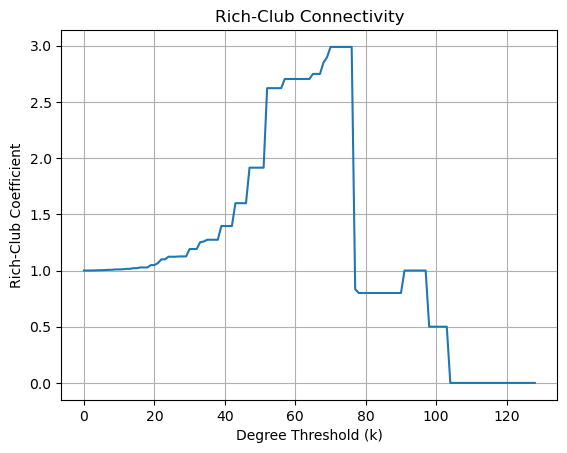

In [51]:
rich_club = nx.rich_club_coefficient(likes, normalized=True)

import matplotlib.pyplot as plt
plt.plot(list(rich_club.keys()), list(rich_club.values()))
plt.xlabel('Degree Threshold (k)')
plt.ylabel('Rich-Club Coefficient')
plt.title('Rich-Club Connectivity')
plt.grid(True)
plt.show()


### Hashtag coocurrence

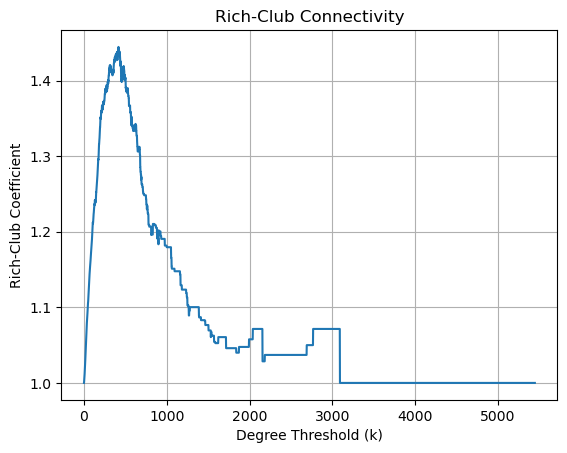

In [52]:
rich_club = nx.rich_club_coefficient(hc, normalized=True)

import matplotlib.pyplot as plt
plt.plot(list(rich_club.keys()), list(rich_club.values()))
plt.xlabel('Degree Threshold (k)')
plt.ylabel('Rich-Club Coefficient')
plt.title('Rich-Club Connectivity')
plt.grid(True)
plt.show()


### Duet/Stitch

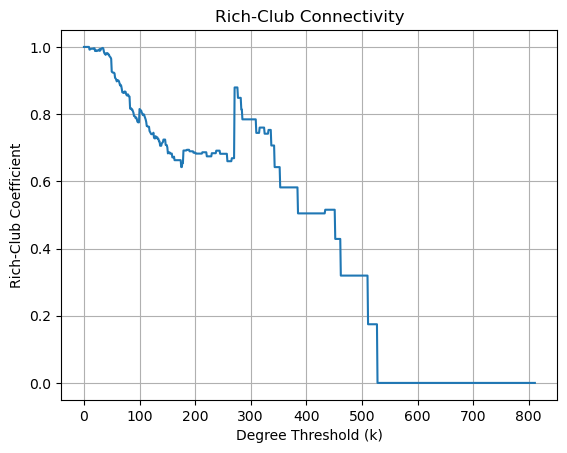

In [57]:
ds_undirected = ds.to_undirected()
ds_undirected.remove_edges_from(nx.selfloop_edges(ds_undirected))
rich_club = nx.rich_club_coefficient(ds_undirected, normalized=True)

import matplotlib.pyplot as plt
plt.plot(list(rich_club.keys()), list(rich_club.values()))
plt.xlabel('Degree Threshold (k)')
plt.ylabel('Rich-Club Coefficient')
plt.title('Rich-Club Connectivity')
plt.grid(True)
plt.show()


### Follows

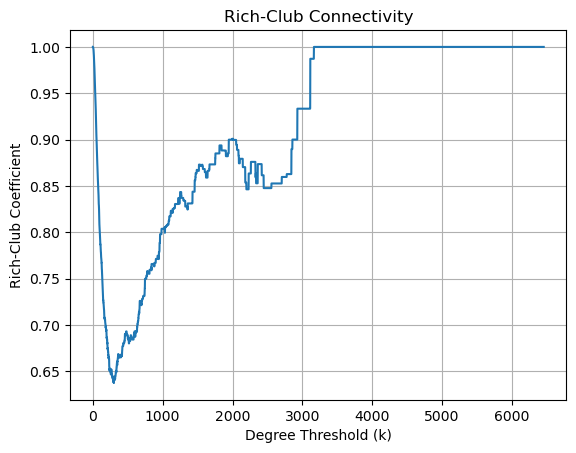

In [58]:
follows_undirected = follows.to_undirected()
follows_undirected.remove_edges_from(nx.selfloop_edges(follows_undirected))
rich_club = nx.rich_club_coefficient(follows_undirected, normalized=True)

import matplotlib.pyplot as plt
plt.plot(list(rich_club.keys()), list(rich_club.values()))
plt.xlabel('Degree Threshold (k)')
plt.ylabel('Rich-Club Coefficient')
plt.title('Rich-Club Connectivity')
plt.grid(True)
plt.show()
